## HELP International - Clustering Assignment
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

The CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

The problem statement is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then need to suggest the countries which the CEO needs to focus on the most.  

### Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
help1 = pd.read_csv("Country-data.csv")

In [4]:
help1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# shape of the dataframe (no. of rows and columns)
help1.shape

(167, 10)

In [6]:
# information about the dataframe (columns, counts, datatype)
help1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
help1['country'].value_counts()

Sweden           1
Greece           1
Ireland          1
Malta            1
Qatar            1
                ..
Cote d'Ivoire    1
Kazakhstan       1
Oman             1
Ukraine          1
Poland           1
Name: country, Length: 167, dtype: int64

In [8]:
# find any missing values in the dataframe
help1.isnull().values.sum()

0

In [9]:
# missing values
round(100*(help1.isnull().sum())/len(help1), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [10]:
help1.duplicated().sum()

0

There are 167 unique countries in the dataframe with datatype as "Object" and other 9 columns with integer or float datatype.
These are no null and duplicate values in the dataframe

In [11]:
# describe on the dataframe to get statistical information
help1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Data Conversion

In [12]:
# converting imports,exports ,health in terms of gdpp as it is mentioned as "%age of the GDP per capita"
help1['imports']=round((help1.imports*help1.gdpp)/100)
help1['health']=round((help1.health*help1.gdpp)/100)
help1['exports']=round((help1.exports*help1.gdpp)/100)

In [13]:
help1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200


In [14]:
help1.describe(percentiles=[0.25,0.50,0.75,0.90,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.622754,1056.754491,6588.401198,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.902072,1801.410229,14710.816178,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.000000,13.000000,1.000000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.000000,78.500000,640.000000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.000000,322.000000,2046.000000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,977.000000,7719.500000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.200000,3825.600000,15034.600000,41220.000000,16.640000,80.400000,5.322000,41840.000000
99%,153.400000,64794.260000,8410.040000,55371.720000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,208.000000,183750.000000,8664.000000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Data Visualization

In [15]:
cols = help1.columns[1:]
cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

#### Univariate Analysis using Distplot

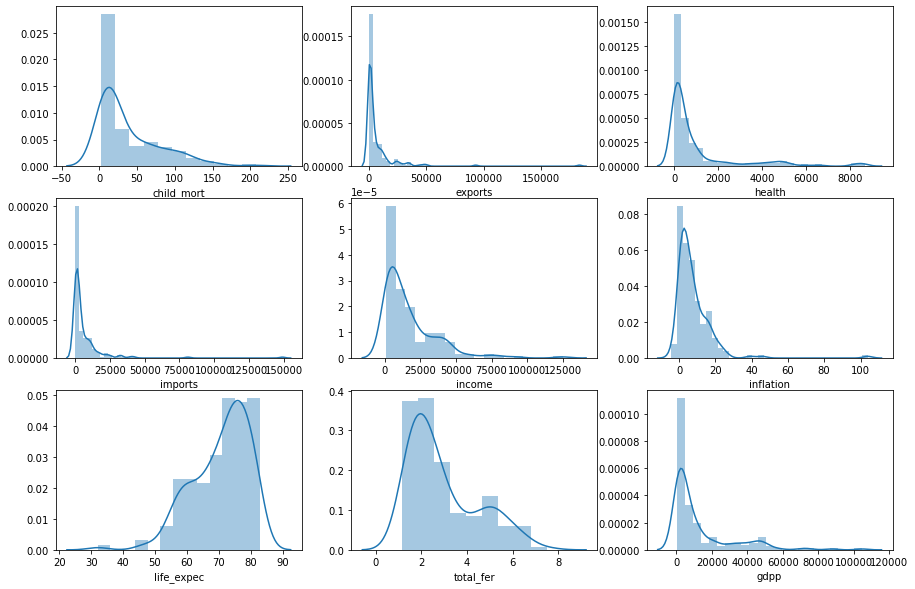

In [16]:
cnt=0
plt.figure(figsize=(15,10))
for i in cols:
    plt.subplot(3,3,cnt+1)
    sns.distplot(help1[i])
    cnt = cnt+1
plt.show()

The distribution plot of the individual columns represent that they are not normally distributed. Either they are right skewed or left skewed. For few of the columns there seems to be more than one peak. Therefore standardization is required using Standard Scaler and also there is chance of producing clusters.

#### Outlier Analysis using Boxplot

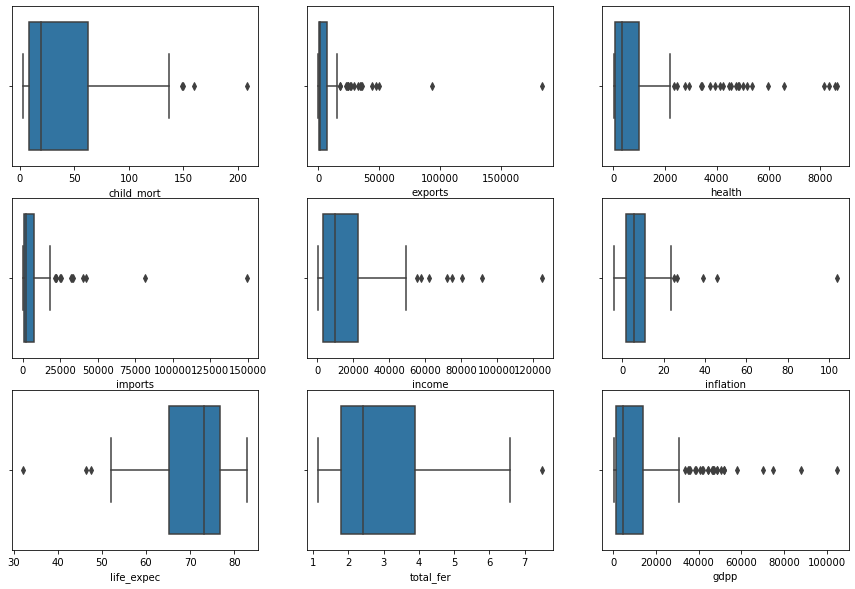

In [17]:
plt.figure(figsize=(15,10))
for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =help1)
plt.show()

Outlier is present in all the columns. If we treat outliers, then there is a chance of missing any of countries which are in dire need of aid. So proceeding with not treating Outliers

In [18]:
help1.shape

(167, 10)

#### Bivariate using Pairplot for the numeric variables 

<Figure size 1296x720 with 0 Axes>

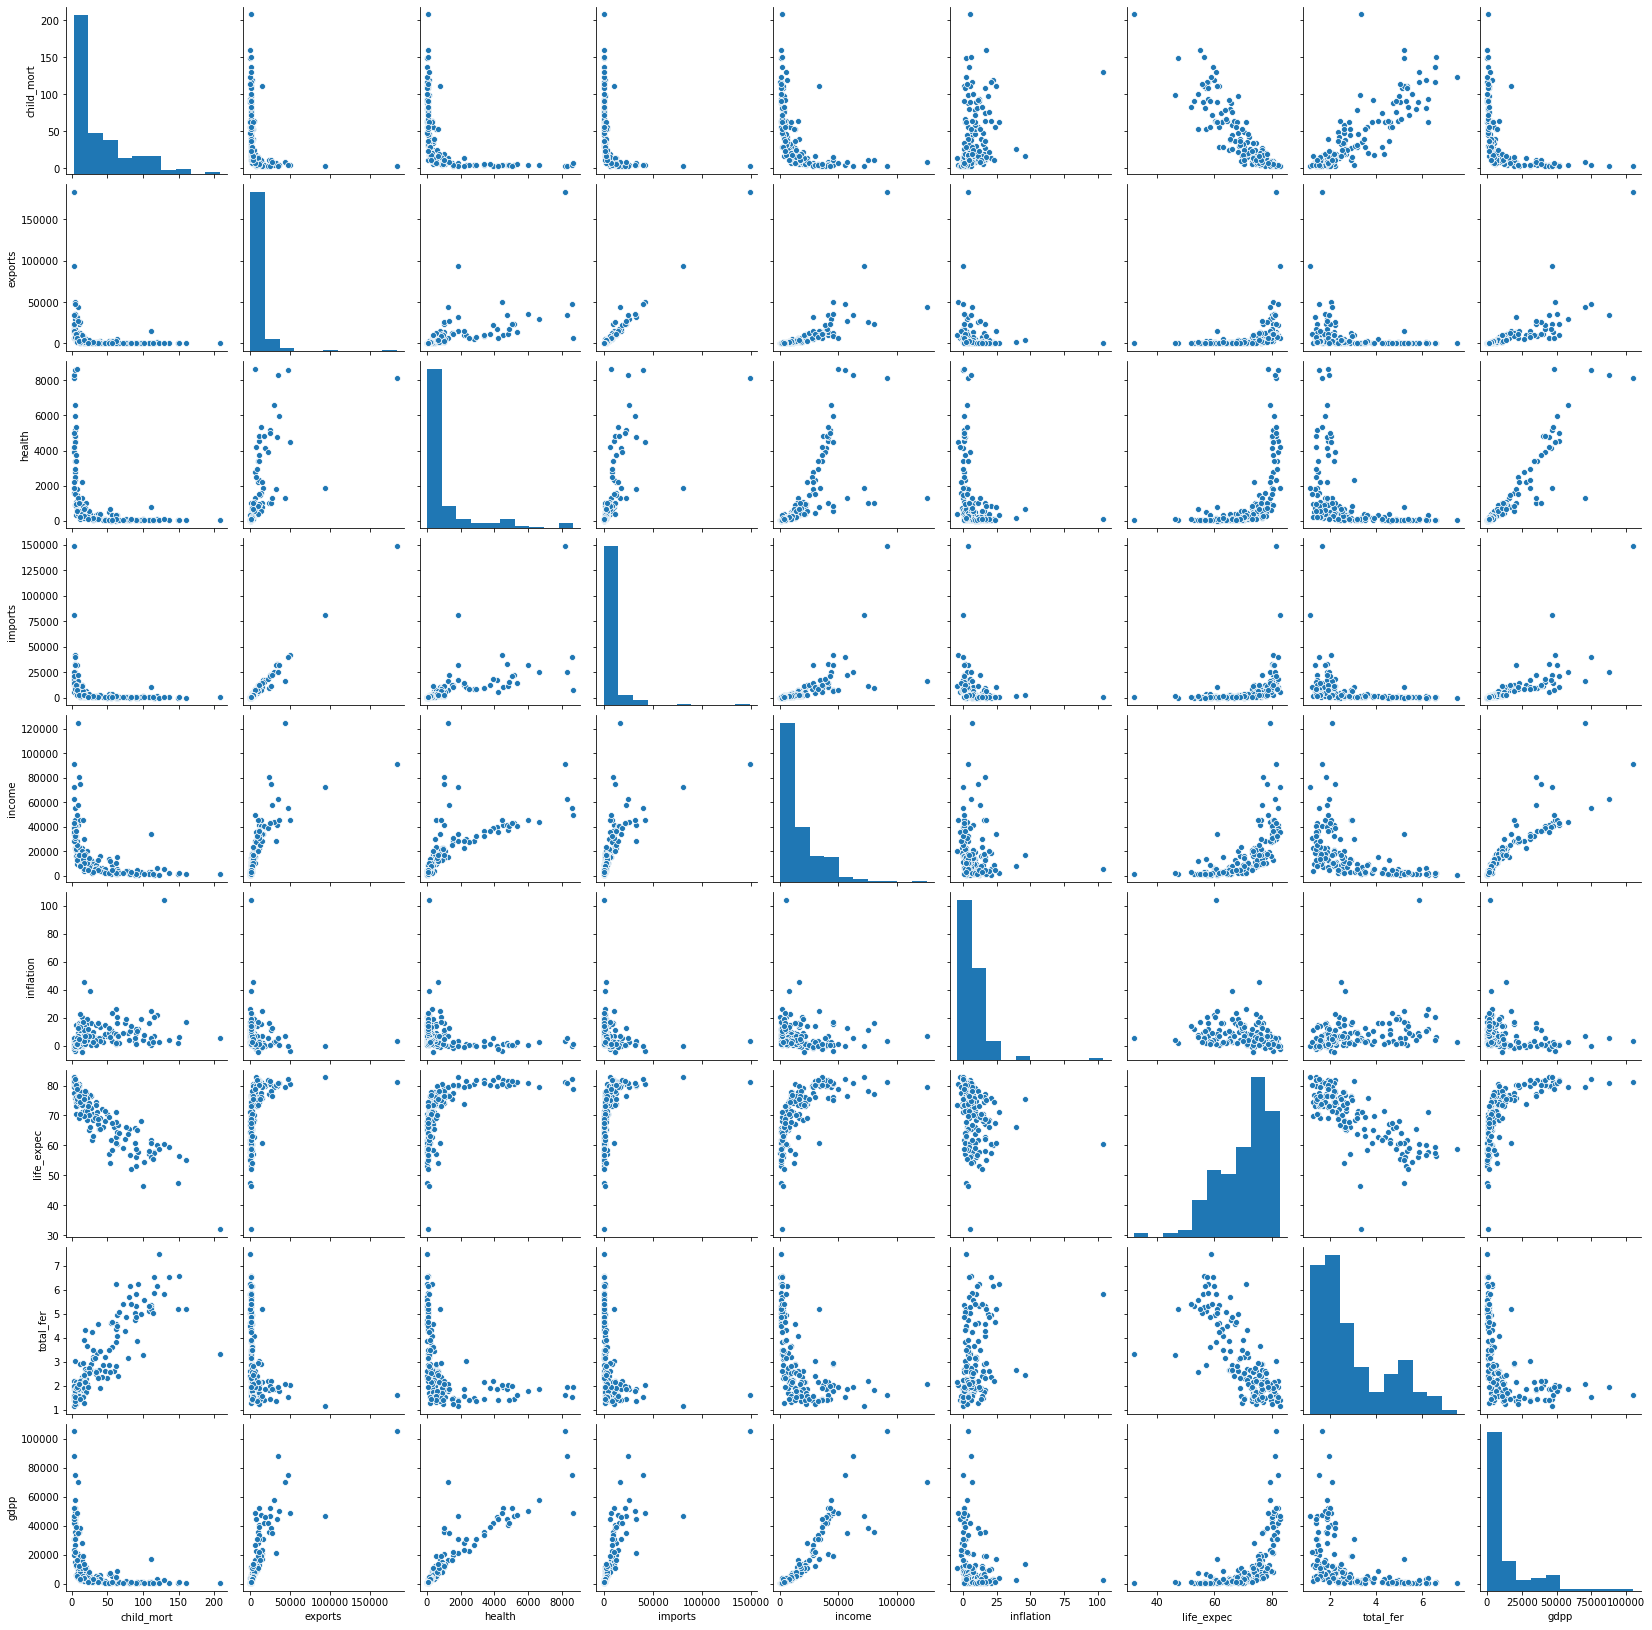

In [19]:
plt.figure(figsize=(18,10))
sns.pairplot(help1[cols])
plt.show()

#### Heat Map

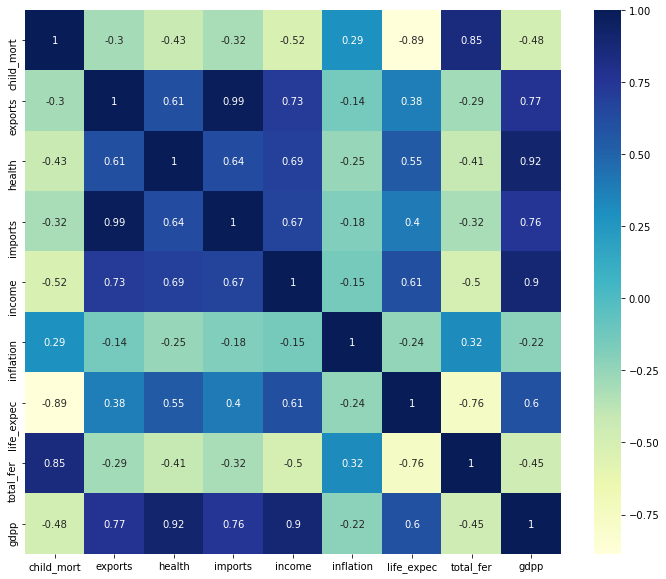

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(help1.corr(),cmap='YlGnBu', annot=True)
plt.show()

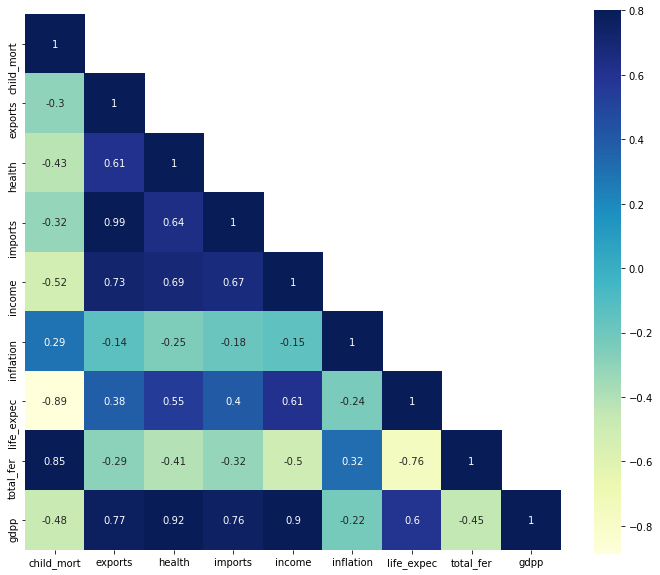

In [21]:
mask = np.array(help1.corr())
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
sns.heatmap(help1.corr(), mask=mask, vmax=0.8, square=True, annot=True,cmap='YlGnBu')

1. child mortality have high positive correlation with total fertility and negative correlation with life expectancy 
2. exports has high positive correlation with imports
3. health has high positive correlation with gdpp
4. income has high positive correlation with gdpp

### Hopkins Statistics

In [22]:
## Check the HOPKINS
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [23]:
hopkins(help1.drop('country', axis=1))

0.9792971932489155

Since Hopkins Statistics value is greater than 0.70, the data present in this dataframe is good for clustering

### Standarizing the data using Standard Scaler

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
help1_scaled = ss.fit_transform(help1.drop('country',axis=1))

In [25]:
help1_scaled = pd.DataFrame(help1_scaled)
help1_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.411028,-0.565005,-0.432299,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350202,-0.439171,-0.313663,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318506,-0.484828,-0.353754,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291385,-0.532155,-0.345981,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104332,-0.178593,0.040745,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [26]:
help1_scaled.columns = help1.columns[1:]
help1_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411028,-0.565005,-0.432299,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350202,-0.439171,-0.313663,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318506,-0.484828,-0.353754,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291385,-0.532155,-0.345981,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104332,-0.178593,0.040745,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### Modelling

### K-Means Clustering

#### Finding the Optimal Number of Clusters

In [27]:
from sklearn.cluster import KMeans

#### elbow-curve/SSD

In [28]:
ssd=[]
for k in range(2,11):
    kmean = KMeans(n_clusters = k, max_iter=50).fit(help1_scaled)
    ssd.append([k,kmean.inertia_])

ssd = pd.DataFrame(ssd)
ssd

,0,1
0,2,942.204008
1,3,651.379888
2,4,479.760428
3,5,400.504994
4,6,342.631422
5,7,309.217188
6,8,271.702171
7,9,243.627110
8,10,216.393977


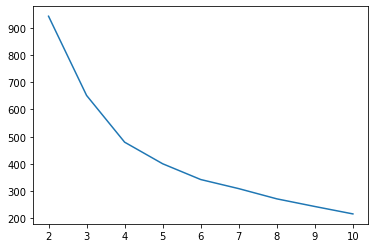

In [29]:
plt.plot(ssd[0],ssd[1])

#### Silhouette Analysis

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
sil = []
for k in range(2, 11):
    kmean =KMeans(n_clusters = k, random_state = 0).fit(help1_scaled)
    sil.append([k, silhouette_score(help1_scaled, kmean.labels_)])
    
sil = pd.DataFrame(sil)
sil

,0,1
0,2,0.458635
1,3,0.421863
2,4,0.429150
3,5,0.434082
4,6,0.397301
5,7,0.306251
6,8,0.303490
7,9,0.303393
8,10,0.310342


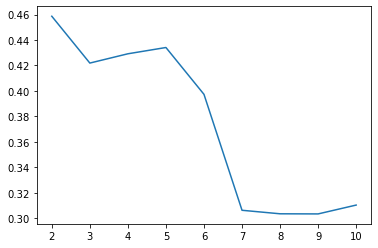

In [32]:
plt.plot(sil[0], sil[1])

From Elbow curve and Silhouette Analysis K=3 to be the optimum value

#### Iteration 1 with K=3

In [33]:
# the model with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(help1_scaled)
# assign the label
help1['K_cluster_id_3'] = kmeans.labels_

In [34]:
help1['K_cluster_id_3'].value_counts()

2    91
0    48
1    28
Name: K_cluster_id_3, dtype: int64

#### Cluster Visualization with K=3

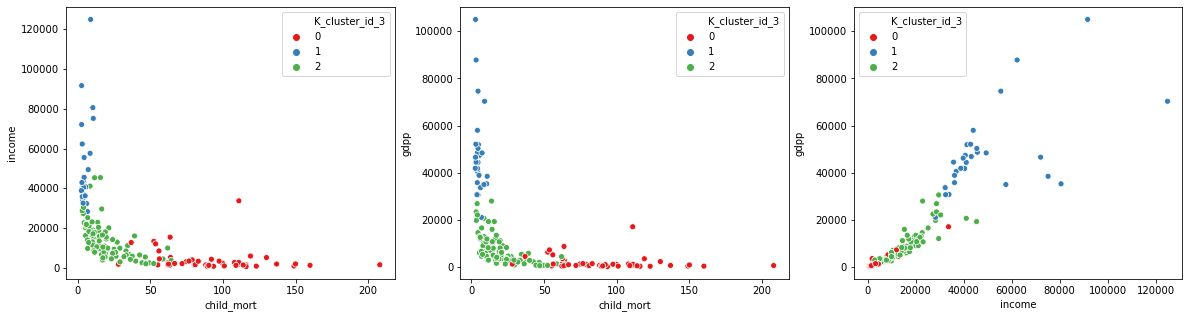

In [35]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='K_cluster_id_3', data=help1, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='K_cluster_id_3', data=help1, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(x='income', y='gdpp', hue='K_cluster_id_3', data=help1, palette='Set1')
plt.show()

#### Cluster Profiling with K=3

In [36]:
help1[['child_mort','income','gdpp','K_cluster_id_3']].groupby('K_cluster_id_3').mean()

,child_mort,income,gdpp
K_cluster_id_3,,,
0,91.610417,3897.354167,1909.208333
1,5.046429,50178.571429,48114.285714
2,20.357143,13968.021978,7979.912088


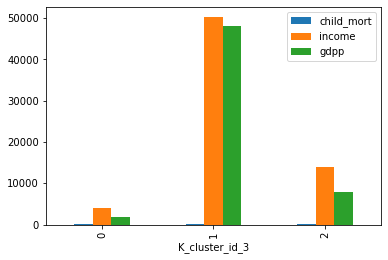

In [37]:
help1[['child_mort','income','gdpp','K_cluster_id_3']].groupby('K_cluster_id_3').mean().plot(kind='bar')

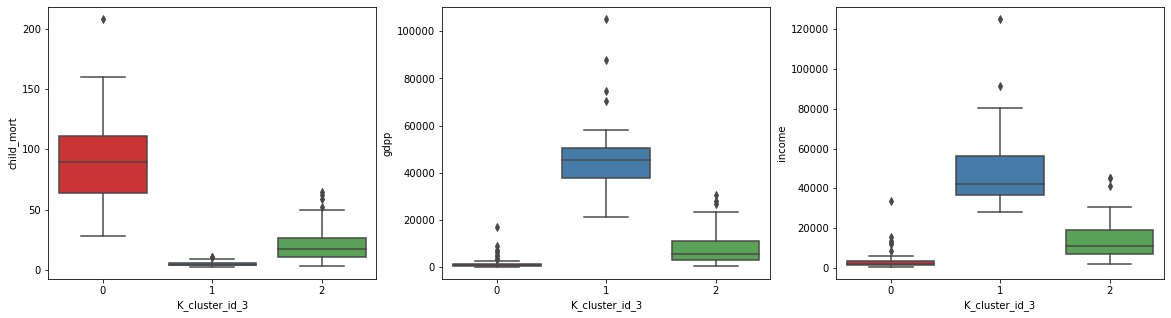

In [38]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x='K_cluster_id_3',y='child_mort',data=help1, palette='Set1')
plt.subplot(1,3,2)
sns.boxplot(x='K_cluster_id_3',y='gdpp', data=help1, palette='Set1')
plt.subplot(1,3,3)
sns.boxplot(x='K_cluster_id_3',y='income', data=help1, palette='Set1')
plt.show()

##### On visualizing the charts from Barplot and Boxplot, which are having high child_mort, low income and low gdpp, we conclude that "Cluster 0" is in the dire need of aid 

In [39]:
dire_need_k3 = help1[help1['K_cluster_id_3']==0]
dire_need_k3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_cluster_id_3
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,180.0,31.0,282.0,1820,0.885,61.8,5.36,758,0
21,Botswana,52.5,2769.0,527.0,3258.0,13300,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,110.0,39.0,170.0,1430,6.810,57.9,5.87,575,0


In [40]:
dire_need_k3 = dire_need_k3.sort_values(by=['gdpp','child_mort','income'], ascending=[True, False, True])
dire_need_k3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_cluster_id_3
26,Burundi,93.6,21.0,27.0,91.0,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.0,39.0,303.0,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.0,26.0,166.0,609,20.80,57.5,6.54,334,0
112,Niger,123.0,77.0,18.0,171.0,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.0,52.0,138.0,1220,17.20,55.0,5.20,399,0


#### Iteration 2 with K=4

In [41]:
# the model with k=4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(help1_scaled)
# assign the label
help1['K_cluster_id_4'] = kmeans.labels_

In [42]:
help1['K_cluster_id_4'].value_counts()

0    88
1    48
2    29
3     2
Name: K_cluster_id_4, dtype: int64

#### Cluster Visualization with K=4

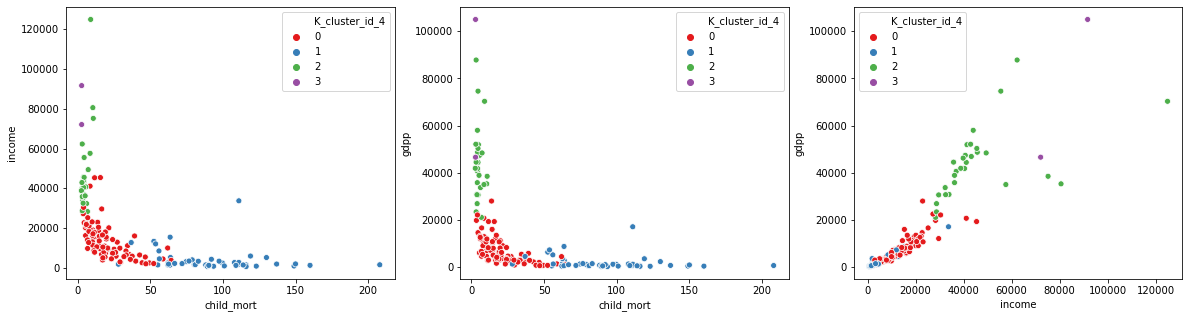

In [43]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='K_cluster_id_4', data=help1, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='K_cluster_id_4', data=help1, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(x='income', y='gdpp', hue='K_cluster_id_4', data=help1, palette='Set1')
plt.show()

#### Cluster Profiling with K=4

In [44]:
help1[['child_mort','income','gdpp','K_cluster_id_4']].groupby('K_cluster_id_4').mean()

,child_mort,income,gdpp
K_cluster_id_4,,,
0,20.918182,13455.568182,7332.636364
1,91.610417,3897.354167,1909.208333
2,5.082759,45800.000000,44017.241379
3,2.800000,81900.000000,75800.000000


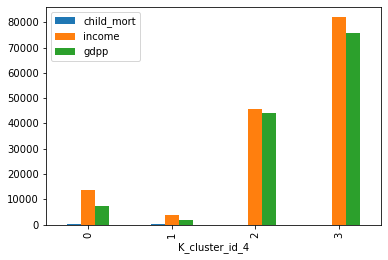

In [45]:
help1[['child_mort','income','gdpp','K_cluster_id_4']].groupby('K_cluster_id_4').mean().plot(kind='bar')

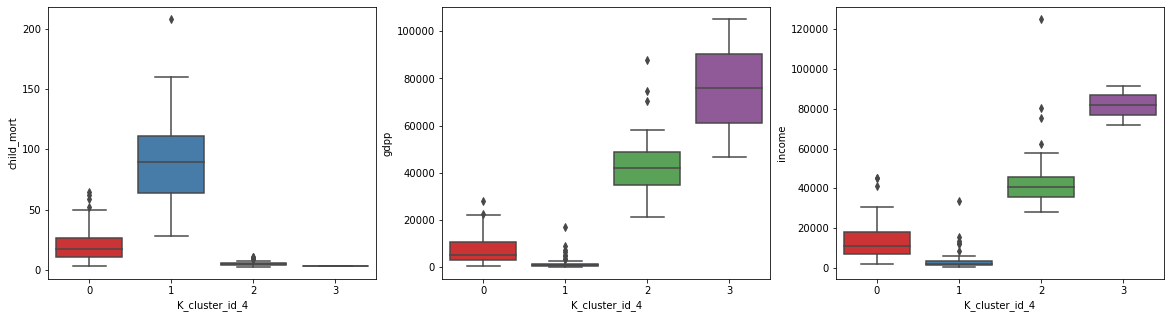

In [46]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x='K_cluster_id_4',y='child_mort',data=help1, palette='Set1')
plt.subplot(1,3,2)
sns.boxplot(x='K_cluster_id_4',y='gdpp', data=help1, palette='Set1')
plt.subplot(1,3,3)
sns.boxplot(x='K_cluster_id_4',y='income', data=help1, palette='Set1')
plt.show()

##### On visualizing the charts from Barplot and Boxplot which are having high child_mort, low income and low gdpp, we conclude that "Cluster 1" is in the dire need of aid 

In [47]:
dire_need_k4 = help1[help1['K_cluster_id_4']==1]
dire_need_k4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_cluster_id_3,K_cluster_id_4
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.440,56.2,5.82,553,0,1
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.400,60.1,6.16,3530,0,1
17,Benin,111.0,180.0,31.0,282.0,1820,0.885,61.8,5.36,758,0,1
21,Botswana,52.5,2769.0,527.0,3258.0,13300,8.920,57.1,2.88,6350,0,1
25,Burkina Faso,116.0,110.0,39.0,170.0,1430,6.810,57.9,5.87,575,0,1


In [48]:
dire_need_k4 = dire_need_k4.sort_values(by=['gdpp','child_mort','income'], ascending=[True, False, True])
dire_need_k4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_cluster_id_3,K_cluster_id_4
26,Burundi,93.6,21.0,27.0,91.0,764,12.30,57.7,6.26,231,0,1
88,Liberia,89.3,62.0,39.0,303.0,700,5.47,60.8,5.02,327,0,1
37,"Congo, Dem. Rep.",116.0,137.0,26.0,166.0,609,20.80,57.5,6.54,334,0,1
112,Niger,123.0,77.0,18.0,171.0,814,2.55,58.8,7.49,348,0,1
132,Sierra Leone,160.0,67.0,52.0,138.0,1220,17.20,55.0,5.20,399,0,1


### Hierarchical Clustering

In [49]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

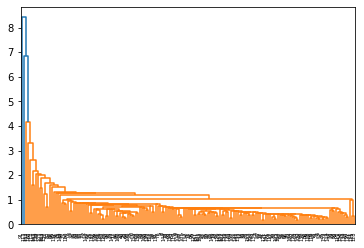

In [50]:
# single linkage
merge_s = linkage(help1_scaled, method="single", metric='euclidean')
dendrogram(merge_s)
plt.show()

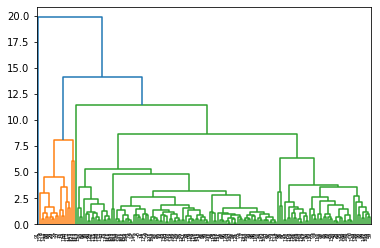

In [51]:
# complete linkage
merge_c = linkage(help1_scaled, method="complete", metric='euclidean')
dendrogram(merge_c)
plt.show()

Single linkage clustering doesnot provide proper grouping for clusters so we proceed with Complete linkage where clustering is much explainable

#### Iteration 1 with 3 clusters

In [52]:
# 3 clusters
cluster_labels = cut_tree(merge_c, n_clusters=3).reshape(-1, )
# assign the label
help1['H_cluster_id_3'] = cluster_labels

In [53]:
help1['H_cluster_id_3'].value_counts()

0    148
1     18
2      1
Name: H_cluster_id_3, dtype: int64

#### Cluster Visualization for 3 clusters

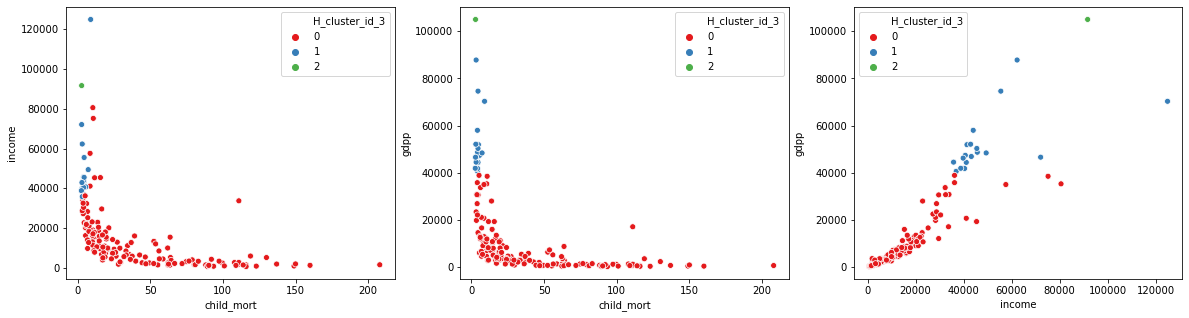

In [54]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='H_cluster_id_3', data=help1, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='H_cluster_id_3', data=help1, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(x='income', y='gdpp', hue='H_cluster_id_3', data=help1, palette='Set1')
plt.show()

#### Cluster Profiling with 3 clusters

In [55]:
help1[['child_mort','income','gdpp','H_cluster_id_3']].groupby('H_cluster_id_3').mean()

,child_mort,income,gdpp
H_cluster_id_3,,,
0,42.630405,12641.641892,7551.445946
1,4.388889,50027.777778,52355.555556
2,2.800000,91700.000000,105000.000000


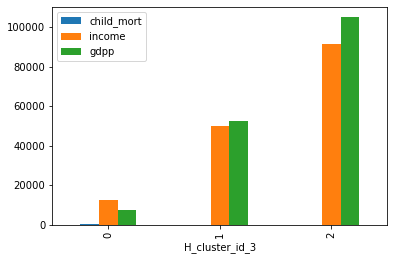

In [56]:
help1[['child_mort','income','gdpp','H_cluster_id_3']].groupby('H_cluster_id_3').mean().plot(kind='bar')

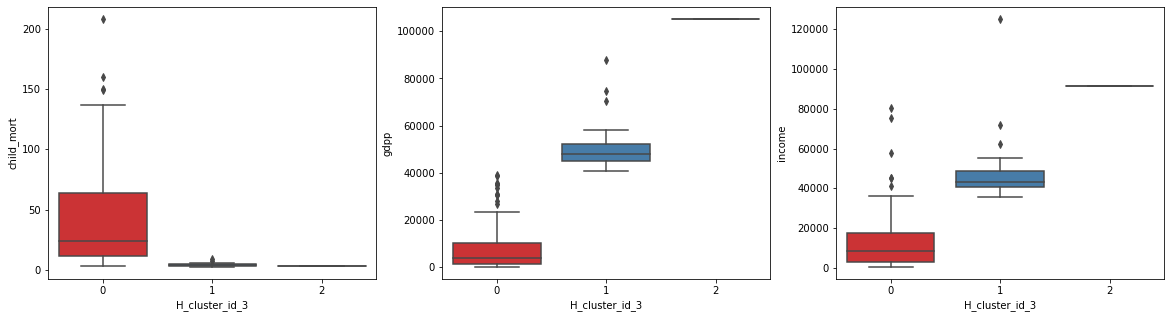

In [57]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x='H_cluster_id_3',y='child_mort',data=help1, palette='Set1')
plt.subplot(1,3,2)
sns.boxplot(x='H_cluster_id_3',y='gdpp', data=help1, palette='Set1')
plt.subplot(1,3,3)
sns.boxplot(x='H_cluster_id_3',y='income', data=help1, palette='Set1')
plt.show()

On visualizing the charts from Barplot and Boxplot which are having high child_mort, low income and low gdpp, we conclude that "Cluster 0" is in the direst need of aid ...

In [58]:
dire_need_H3 = help1[help1['H_cluster_id_3']==0]
dire_need_H3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_cluster_id_3,K_cluster_id_4,H_cluster_id_3
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553,0,1,0
1,Albania,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090,2,0,0
2,Algeria,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460,2,0,0
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530,0,1,0
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200,2,0,0


In [59]:
dire_need_H3 = dire_need_H3.sort_values(by=['gdpp','child_mort','income'], ascending=[True, False, True])
dire_need_H3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_cluster_id_3,K_cluster_id_4,H_cluster_id_3
26,Burundi,93.6,21.0,27.0,91.0,764,12.30,57.7,6.26,231,0,1,0
88,Liberia,89.3,62.0,39.0,303.0,700,5.47,60.8,5.02,327,0,1,0
37,"Congo, Dem. Rep.",116.0,137.0,26.0,166.0,609,20.80,57.5,6.54,334,0,1,0
112,Niger,123.0,77.0,18.0,171.0,814,2.55,58.8,7.49,348,0,1,0
132,Sierra Leone,160.0,67.0,52.0,138.0,1220,17.20,55.0,5.20,399,0,1,0


#### Iteration 2 with 4 clusters

In [60]:
# 4 clusters
cluster_labels = cut_tree(merge_c, n_clusters=4).reshape(-1, )
# assign the label
help1['H_cluster_id_4'] = cluster_labels


In [61]:
help1['H_cluster_id_4'].value_counts()

0    147
1     18
3      1
2      1
Name: H_cluster_id_4, dtype: int64

#### Cluster Visualization for 4 clusters

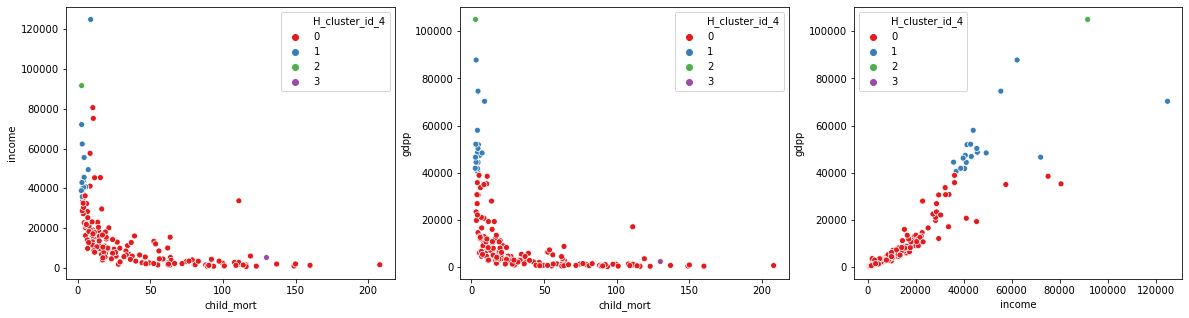

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='H_cluster_id_4', data=help1, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='H_cluster_id_4', data=help1, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(x='income', y='gdpp', hue='H_cluster_id_4', data=help1, palette='Set1')
plt.show()

#### Cluster Profiling with 4 clusters

In [63]:
help1[['child_mort','income','gdpp','H_cluster_id_4']].groupby('H_cluster_id_4').mean()

,child_mort,income,gdpp
H_cluster_id_4,,,
0,42.036054,12692.605442,7586.965986
1,4.388889,50027.777778,52355.555556
2,2.800000,91700.000000,105000.000000
3,130.000000,5150.000000,2330.000000


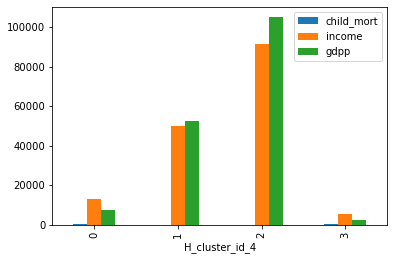

In [64]:
help1[['child_mort','income','gdpp','H_cluster_id_4']].groupby('H_cluster_id_4').mean().plot(kind='bar')

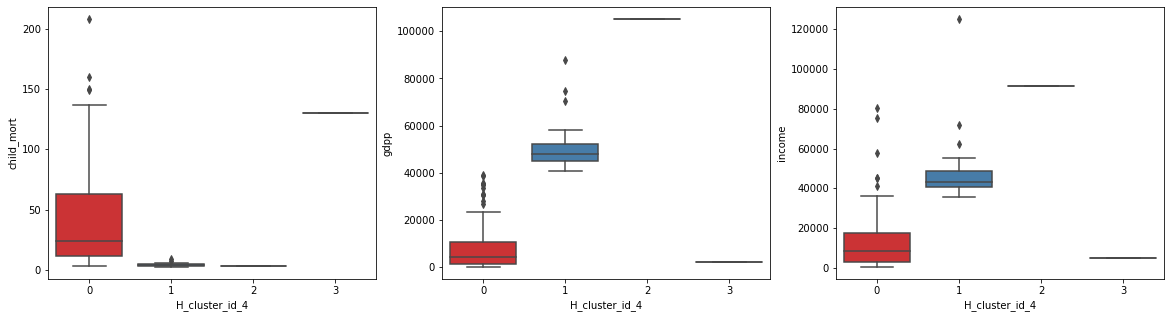

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x='H_cluster_id_4',y='child_mort',data=help1, palette='Set1')
plt.subplot(1,3,2)
sns.boxplot(x='H_cluster_id_4',y='gdpp', data=help1, palette='Set1')
plt.subplot(1,3,3)
sns.boxplot(x='H_cluster_id_4',y='income', data=help1, palette='Set1')
plt.show()

#### On visualizing the charts from Barplot and Boxplot which are having high child_mort, low income and low gdpp, we have   "Cluster 0"falling into the  category of countries which requires direst need of aid ...

In [66]:
dire_need_H4 = help1[help1['H_cluster_id_4']==0]
dire_need_H4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_cluster_id_3,K_cluster_id_4,H_cluster_id_3,H_cluster_id_4
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553,0,1,0,0
1,Albania,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090,2,0,0,0
2,Algeria,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460,2,0,0,0
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530,0,1,0,0
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200,2,0,0,0


In [67]:
dire_need_H4 = dire_need_H4.sort_values(by=['gdpp','child_mort','income'], ascending=[True, False, True])
dire_need_H4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_cluster_id_3,K_cluster_id_4,H_cluster_id_3,H_cluster_id_4
26,Burundi,93.6,21.0,27.0,91.0,764,12.30,57.7,6.26,231,0,1,0,0
88,Liberia,89.3,62.0,39.0,303.0,700,5.47,60.8,5.02,327,0,1,0,0
37,"Congo, Dem. Rep.",116.0,137.0,26.0,166.0,609,20.80,57.5,6.54,334,0,1,0,0
112,Niger,123.0,77.0,18.0,171.0,814,2.55,58.8,7.49,348,0,1,0,0
132,Sierra Leone,160.0,67.0,52.0,138.0,1220,17.20,55.0,5.20,399,0,1,0,0


### Top 5 List of countries with insights

After analysing on the socio-economic and health factors of countries and  Cluster modelling using K-Means and Hierarchical with various iterations, clusters formed using K-Means Algorithm for "K=3 with Cluster ID : 0" and Hierarchical Cluster with "3 and Cluster ID : 0" are producing the same result. But still in order to conclude, we are considering K-Means Algorithm for "K=3 with Cluster ID : 0 " since it has decent grouping 


In [68]:
dire_need_k3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_cluster_id_3
26,Burundi,93.6,21.0,27.0,91.0,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.0,39.0,303.0,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.0,26.0,166.0,609,20.80,57.5,6.54,334,0
112,Niger,123.0,77.0,18.0,171.0,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.0,52.0,138.0,1220,17.20,55.0,5.20,399,0


## The TOP 5 countries which are in dire need of aid and CEO needs to concentrate upon are as below :
### 1. Burundi
### 2. Liberia
### 3. Congo, Dem. Rep.
### 4. Niger
### 5. Sierra Leone